In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('shop data.csv')

In [3]:
df.head(8)

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       22 non-null     object
 1   income    22 non-null     object
 2   gender    22 non-null     object
 3   m_status  22 non-null     object
 4   buys      22 non-null     object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [5]:
df.isna().sum()

age         0
income      0
gender      0
m_status    0
buys        0
dtype: int64

In [10]:
x = df.drop('buys', axis=1) #x = df[['age', 'income', 'gender', 'm_status']] or df.iloc[:,:4]

In [11]:
x.head()

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single


In [12]:
y = df.iloc[:,4] #y = df.buys

In [13]:
y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: buys, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [30]:
LaEnc = LabelEncoder()
x = x.apply(LaEnc.fit_transform)

In [31]:
x.head(7)

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0


In [111]:
df['buys'].unique()

array(['no', 'yes'], dtype=object)

In [117]:
val = ['no', 'yes']

In [118]:
OrEnc = OrdinalEncoder(categories=[val])

In [119]:
OrEnc.fit(df[['buys']])

OrdinalEncoder(categories=[['no', 'yes']])

In [121]:
y = pd.DataFrame(OrEnc.transform(df[['buys']]))

In [122]:
y.head()

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [124]:
OrEnc.categories_

[array(['no', 'yes'], dtype=object)]

# Formula 

<h3 style=color:red>Information Gain </h3>

<img src='Information gain.png' height='600' width = '700'>

<h3 style=color:red> Entropy </h3>

<img src='Entropy.png' height='500' width = '500'>

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [267]:
random_state_value = 42
Accuracies = []

for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=i)
    
    DecTree = DecisionTreeClassifier(random_state=random_state_value)
    DecTree.fit(xtrain, ytrain)
    
    Accuracies.append(DecTree.score(xtest, ytest))
    
Accuracy = max(Accuracies) * 100
print(f"Accuracy: {Accuracy:.2f}")
print(f'Best state: {np.argmax(Accuracies)}')


Accuracy: 85.71
Best state: 1


In [236]:
predict = DecTree.predict(xtest)
predict

array([0., 0., 1., 1., 1., 1., 0.])

In [241]:
df.columns

Index(['age', 'income', 'gender', 'm_status', 'buys'], dtype='object')

In [243]:
plot = pd.DataFrame(np.c_[xtest,ytest,predict],columns=['age', 'income', 'gender', 'm_status', 'original','predicted'])

In [244]:
plot

,age,income,gender,m_status,original,predicted
0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0
3,1.0,2.0,0.0,1.0,1.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0
5,0.0,2.0,1.0,0.0,1.0,1.0
6,1.0,0.0,0.0,0.0,1.0,0.0


## Comarison plot

<AxesSubplot:ylabel='Density'>

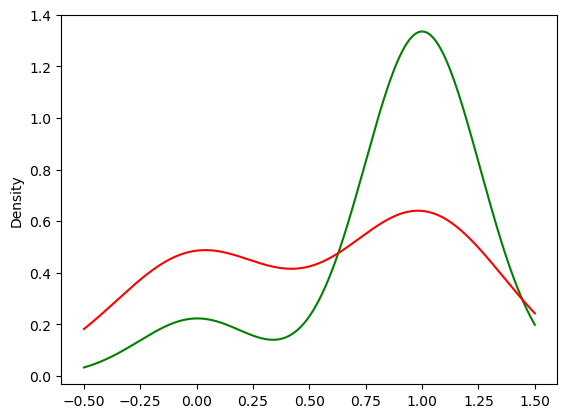

In [246]:
plot['original'].plot(kind='kde',color='g')
plot['predicted'].plot(kind='kde',color='r')

## Tree 

[Text(0.3, 0.9166666666666666, 'age <= 0.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.2, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4, 0.75, 'income <= 0.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.3, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.5833333333333334, 'm_status <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2, 0.4166666666666667, 'age <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.25, 'gender <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.4166666666666667, 'gender <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.7, 0.25, 'age <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nval

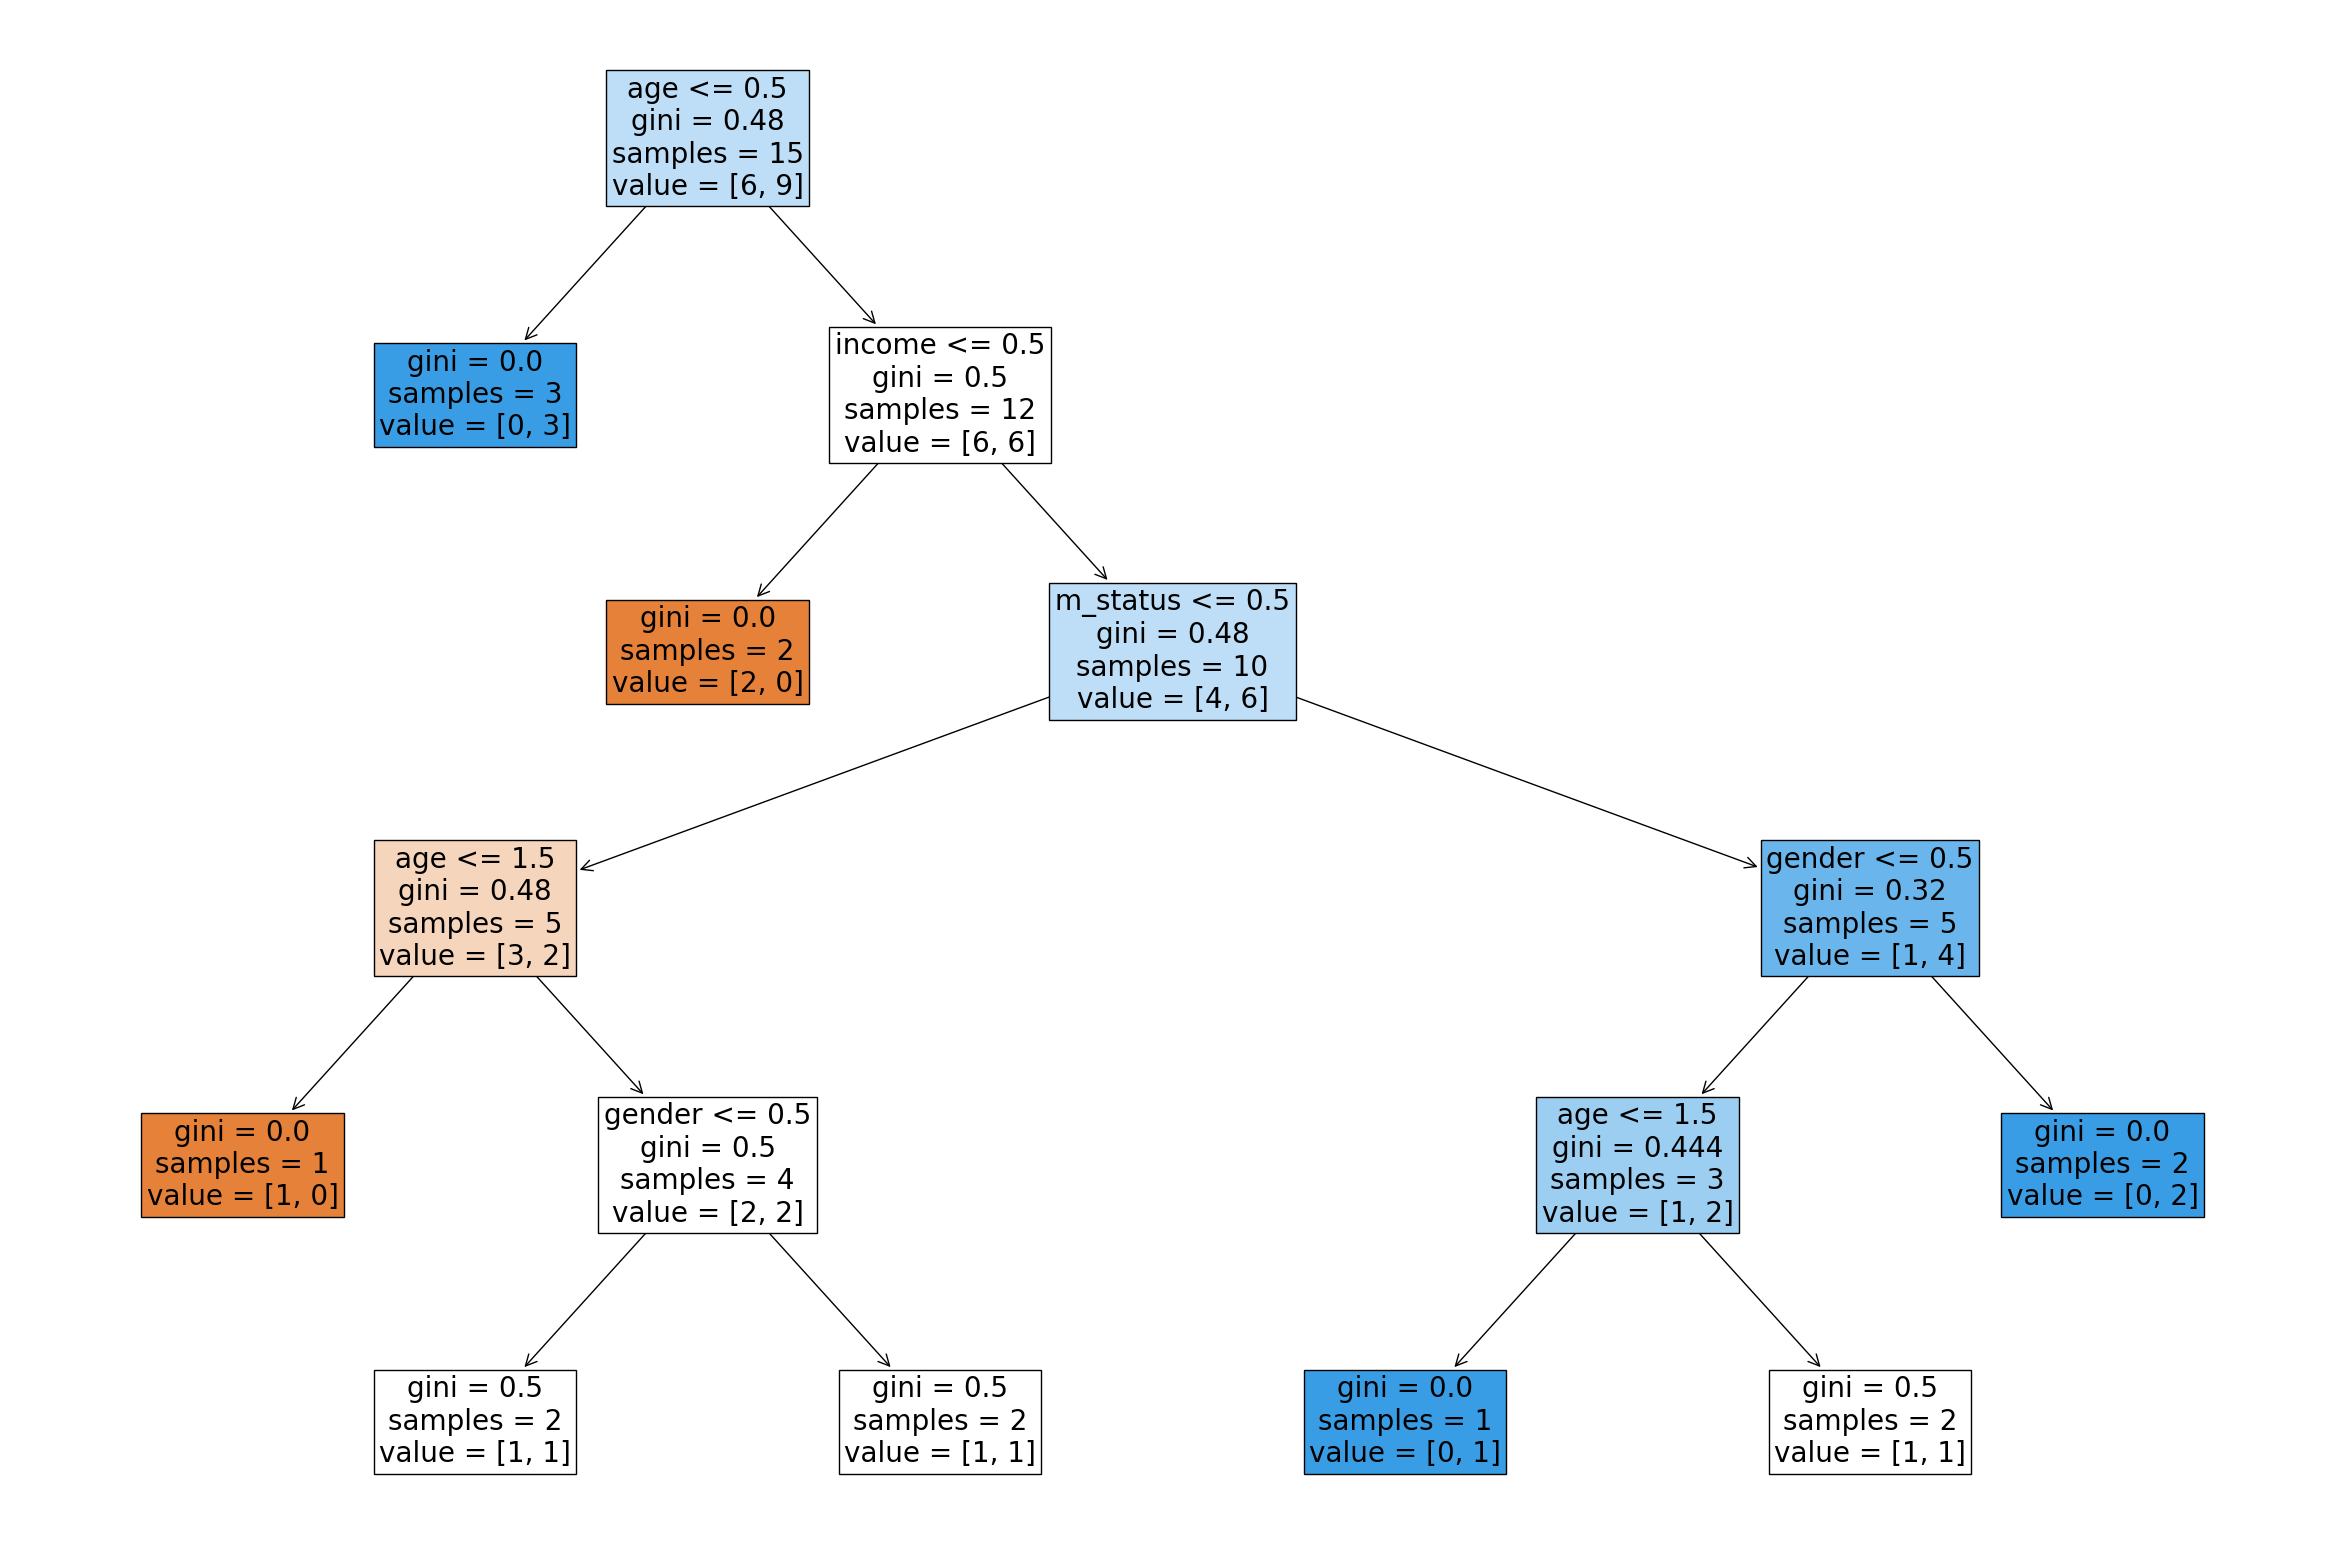

In [270]:
from sklearn import tree
plt.figure(figsize=(30,20))

tree.plot_tree(DecTree, feature_names=x.columns, filled=True, fontsize=20)